# Pymaceuticals Inc.
---

### Analysis

- The study's sample of mice included a balanced gender distribution, with females accounting for 49.4% and males 50.6%
- Among the drug regimens tested, Capomulin was administered to the highest number of mice (230), closely followed by Ramicane (228). Notably, these two treatments demonstrated the most significant effectiveness in reducing overall tumor volume when compared to all other drug regimens examined.
- In the case of mouse ID 1509, which recieved the Capomulin treatment, there was a notable reduction in total tumor volume over the 45-day study period, indicating the treatment's efficacy.
- Furthermore, the observed strong positive correlation between mouse weight and tumor size (with a p-value of 0.84) suggests that as mouse weight increases, so does tumor volume.
- The study results exhibit a high level of reliability and consistency, as there was only one outlier (Infubinol) identified within the dataset for the drugs of interest. This strengthens the overall validity and robustness of the findings. 
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="right")

# Display the data table for preview
mice_df = mice_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice.
mouse_count = mice_df['Mouse ID'].nunique()
mouse_count

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_df.loc[mice_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mice_df[mice_df['Mouse ID'] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_df[mice_df['Mouse ID'].isin(duplicate_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df[mice_df['Mouse ID'] != "g989"]
clean_count = clean_mice['Mouse ID'].nunique()
clean_count

248

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume':drug_mean, 'Median Tumor Volume':drug_median,
                         'Tumor Volume Variance':drug_var, 'Tumor Volume Std. Dev.':drug_std,
                         'Tumor Volume Std. Err.':drug_SEM})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

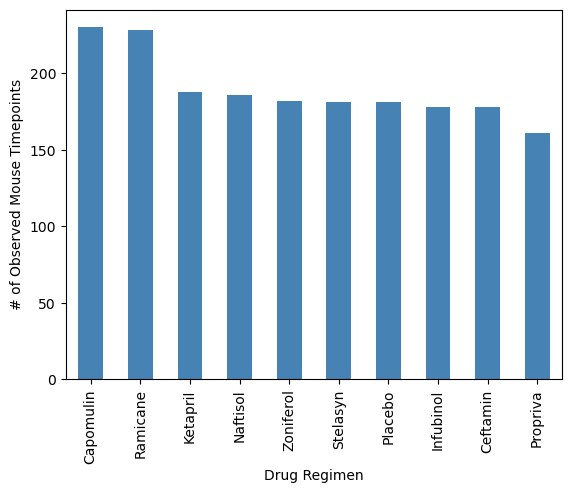

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df['Drug Regimen'].value_counts()
drug_regimen.plot(kind='bar', color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

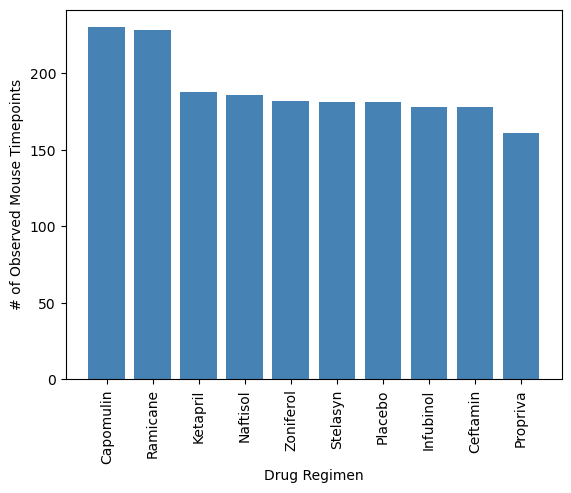

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen.index
y_axis = drug_regimen.values

plt.bar(x_axis, y_axis, color='steelblue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

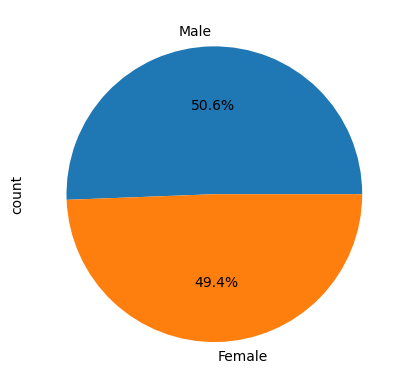

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df['Sex'].value_counts()
gender_data.plot(kind="pie", autopct="%1.1f%%")

plt.show()

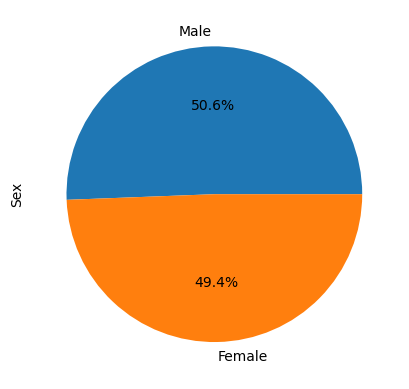

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [958,935]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = mice_df[mice_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = filtered_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = timepoint_df.merge(filtered_df,on=['Mouse ID', 'Timepoint'], how="left")
tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol = tumor_df.loc[tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
        
    # add subset 
    tumor_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


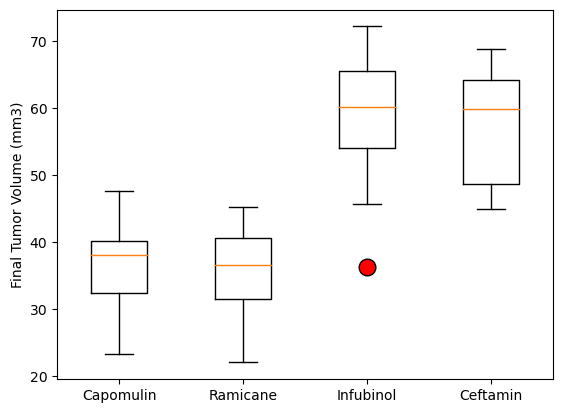

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red = dict(markerfacecolor = 'red', markersize=12)
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(tumor_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops=red)
plt.show()

## Line and Scatter Plots

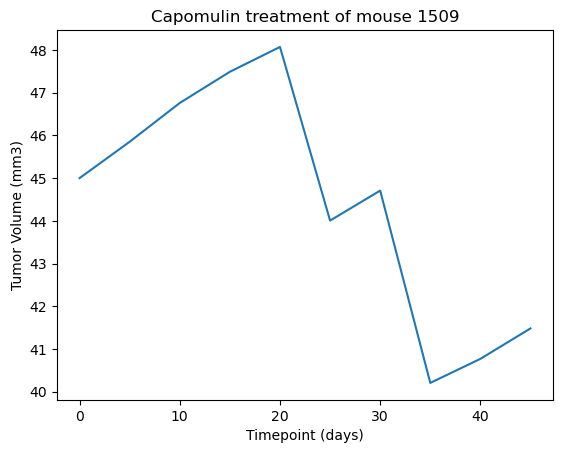

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
x_axis = single_mouse["Timepoint"]
y_axis = single_mouse["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)
plt.show()

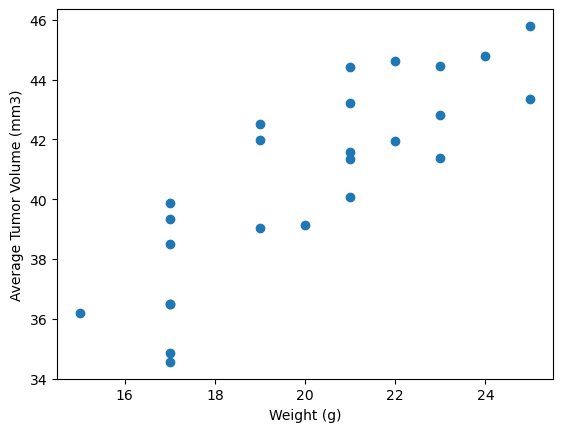

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
total_mice = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)
x_axis = total_mice['Weight (g)']
y_axis = total_mice['Tumor Volume (mm3)']

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis, y_axis)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


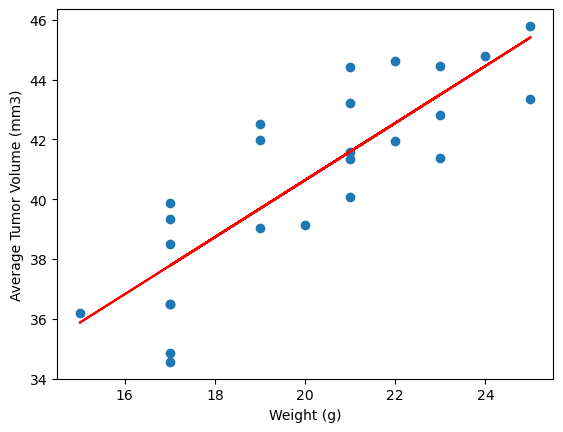

In [89]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
rounded_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is: {rounded_coefficient}")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept

plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()